<h3> EDA Part 2 </h3>

* Part 2 will deal with trend + seasonality. 
* It will look at dataframes from multiple years.


In [67]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

from statsmodels.tsa.seasonal import seasonal_decompose

Import the dataframes for the years 2011 – 2012

In [68]:
df_daily = pd.read_csv('cleaned_data/df_daily.csv')

In [69]:
df_hourly = pd.read_csv('cleaned_data/df_hourly.csv')

In [70]:
df_daily.head(2)

,Unnamed: 0,date,season,year,month,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month,calendar_week
0,0,2011-01-01,winter,2011,1,no,sat,no,misty,8.2,8.0,80.6,10.7,331,654,985,5.063729,5 to 15,2011-01,52
1,1,2011-01-02,winter,2011,1,no,sun,no,misty,9.1,7.3,69.6,16.7,131,670,801,3.837369,5 to 15,2011-01,52


In [71]:
df_hourly.head(2)

,Unnamed: 0,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month
0,0,2011-01-01,winter,2011,1,0,no,sat,no,clear,3.3,3.0,81.0,0.0,3,13,16,0.355031,-5 to 5,2011-01
1,1,2011-01-01,winter,2011,1,1,no,sat,no,clear,2.3,2.0,80.0,0.0,8,32,40,-0.790695,-5 to 5,2011-01


<h3> Import aggregated data for all years (2011 – 2020) </h3>

These dataframes contain the total number of users per day or per hour. 

In [72]:
df_all_agg_daily = pd.read_csv('cleaned_data/df_all_agg_daily.csv')
df_all_agg_hourly = pd.read_csv('cleaned_data/df_all_agg_hourly.csv')

In [73]:
df_all_agg_daily.tail(2) 

# the "registered" and "casual" columns hold the total per day

,date,registered,casual,year,month,day,year_month
3388,2019-12-30,4695,724,2019,12,Mon,2019-12
3389,2019-12-31,5096,650,2019,12,Tue,2019-12


In [74]:
df_all_agg_hourly.tail(2)

# the "registered" and "casual" columns hold the total per hour

,date,registered,casual,hour,year,month,day,year_month
81347,2019-12-31,71,9.0,22,2019,12,Tue,2019-12
81348,2019-12-31,83,24.0,23,2019,12,Tue,2019-12


In [75]:
df_by_month = df_all_agg_daily.groupby('year_month').sum()[['registered', 'casual']].reset_index()

In [76]:
df_by_month['total'] = df_by_month['registered'] + df_by_month['casual']

In [77]:
df_by_month.head(2)

,year_month,registered,casual,total
0,2010-09,2704,1298,4002
1,2010-10,24992,10960,35952


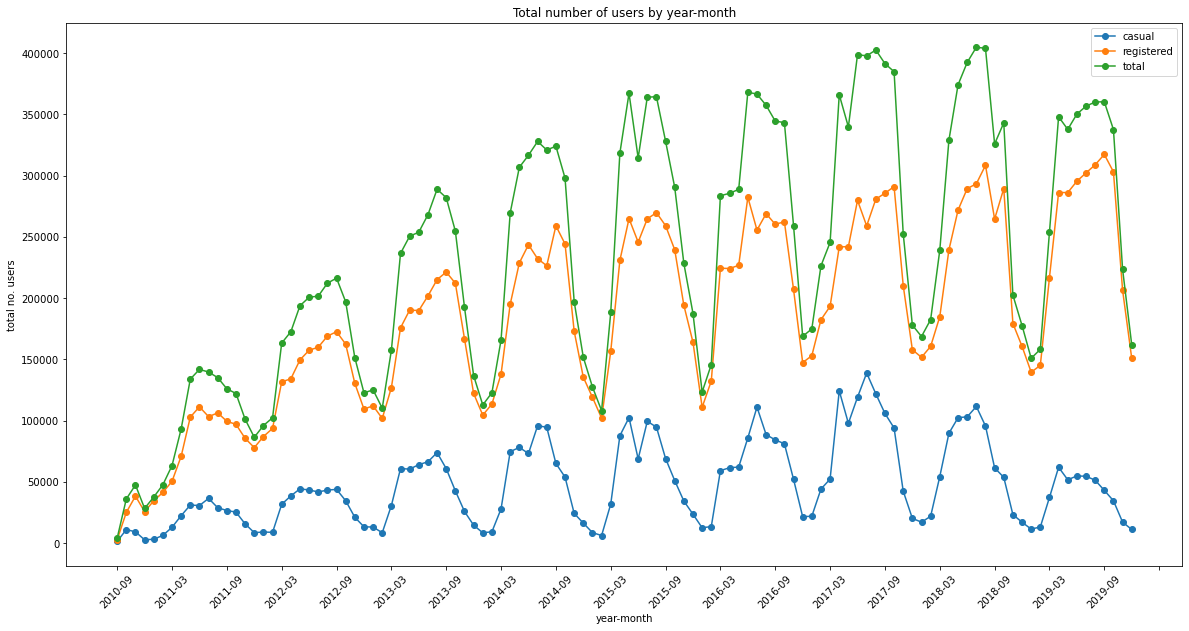

In [78]:
fig, ax = plt.subplots(figsize = (20,10))
plt.title('Total number of users by year-month')

ax.plot(df_by_month['year_month'], df_by_month['casual'], label = 'casual', marker = 'o')
ax.plot(df_by_month['year_month'], df_by_month['registered'], label = 'registered', marker = 'o')
ax.plot(df_by_month['year_month'], df_by_month['total'], label = 'total', marker = 'o')
#ax.xticks(ticks = df_by_month['year_month'], rotation = 90)
tick_spacing = 6
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.xticks(rotation=45)
plt.xlabel ('year-month')
plt.ylabel ('total no. users')
plt.legend()
plt.show()

* We see steady growth in registered users, but little overall growth in casual users. <br>

* In casual users, the amplitude increases year on year, but the trend grows much more slowly. <br>

* We will get a more precise picture below, when we do trend + seasonality analysis. <br>

* Would be good to know: <br>
** Of the new registered users, how many of them were previously casual users? <br>
** Do people go from being non-users to registered users? Or do most new registered users come from being casual users first?

Do monthly plots by year, then stacked above each other: <br>
Like in section 4 here: <br>

https://www.machinelearningplus.com/time-series/time-series-analysis-python/   <br>

Also try and get the same data from the following years too



In [79]:
df_by_month.head(20)

,year_month,registered,casual,total
0,2010-09,2704,1298,4002
1,2010-10,24992,10960,35952
2,2010-11,38270,9117,47387
3,2010-12,25620,2626,28246
4,2011-01,34438,3065,37503
5,2011-02,41326,6232,47558
6,2011-03,50382,12813,63195
7,2011-04,70781,22319,93100
8,2011-05,102789,30996,133785
9,2011-06,111175,30566,141741


In [80]:
df_by_month['year_month'] = pd.to_datetime(df_by_month['year_month']).dt.to_period('M')

In [81]:
df_by_month['year'] = df_by_month['year_month'].dt.year
df_by_month['month'] = df_by_month['year_month'].dt.strftime('%b')

In [83]:
df_by_month.head()

,year_month,registered,casual,total,year,month
0,2010-09,2704,1298,4002,2010,Sep
1,2010-10,24992,10960,35952,2010,Oct
2,2010-11,38270,9117,47387,2010,Nov
3,2010-12,25620,2626,28246,2010,Dec
4,2011-01,34438,3065,37503,2011,Jan


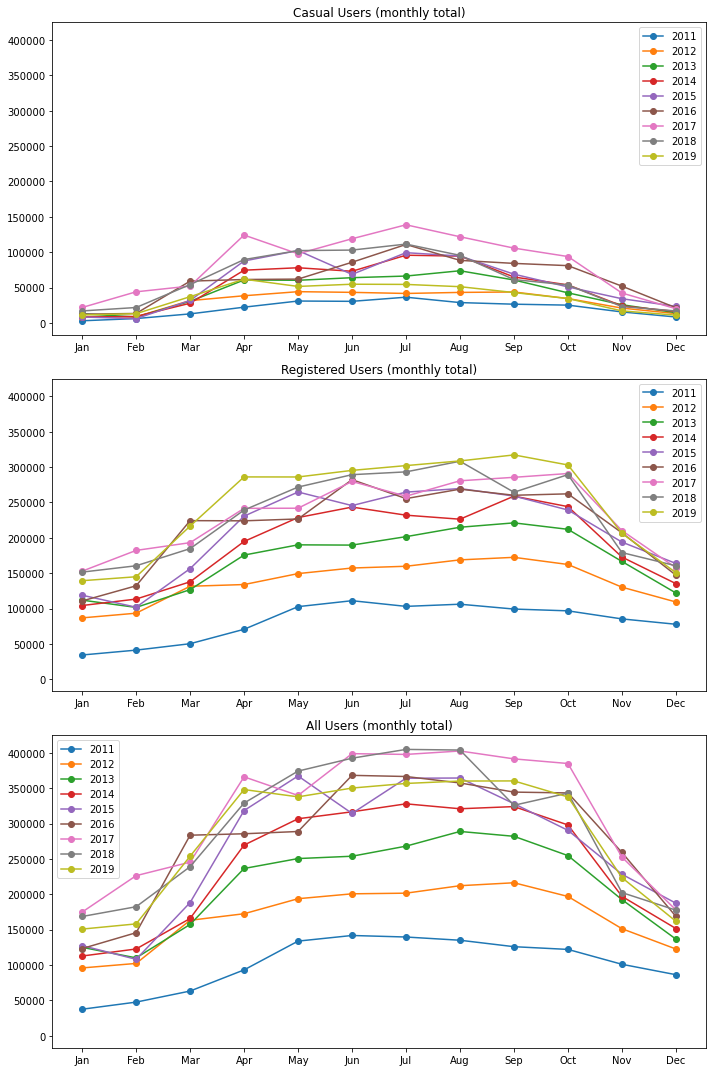

In [85]:
# Draw Plot
fig, ax = plt.subplots(3,1, figsize = (10, 15), sharey = True)

years = list(df_by_month['year'].unique())

colormap = plt.cm.Paired

for year in years: 
    if year != 2010: 
        ax [0].plot('month', 'casual', data = df_by_month[df_by_month['year'] == year], label = f'{year}', marker = 'o')
        ax [1].plot('month', 'registered', data = df_by_month[df_by_month['year'] == year], label = f'{year}' , marker = 'o')
        ax [2].plot('month', 'total', data = df_by_month[df_by_month['year'] == year], label = f'{year}' , marker = 'o')

ax[0].legend()
ax[0].set_title('Casual Users (monthly total)')


ax[1].legend()
ax[1].set_title('Registered Users (monthly total)')



ax[2].legend()
ax[2].set_title('All Users (monthly total)')

plt.tight_layout()
plt.show()



* Among registered users, we see quite significant growth in the first three or four years, which then slows down from 2014 onwards. <br>
* Among casual users, the growth was always more stagnant. <br>
* Also interesting to note: among registered users, the peak shifts to the right, towards autumn. A consequence of global warming?

Notes to self: <br>
Can do what Tanusree did with box plots. <br>
Do daily plots for week 1. <br>
And then concatenate weeks 1 – 52. <br>
This will tell you trend with respect to week. And seasonality with respect to day. <br>

Key insight is that the TREND is always going to be one level of abstraction than the SEASONALITY. <br>
If the graph shows you an upwards trend on a * weekly * basis, then the seasonality would show you on which * days * there are peaks and troughs. 

<h3> Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution </h3>

In [18]:
df_by_month.head()

,year_month,registered,casual,total,year,month
0,2010-09,2704,1298,4002,2010,Sep
1,2010-10,24992,10960,35952,2010,Oct
2,2010-11,38270,9117,47387,2010,Nov
3,2010-12,25620,2626,28246,2010,Dec
4,2011-01,34438,3065,37503,2011,Jan


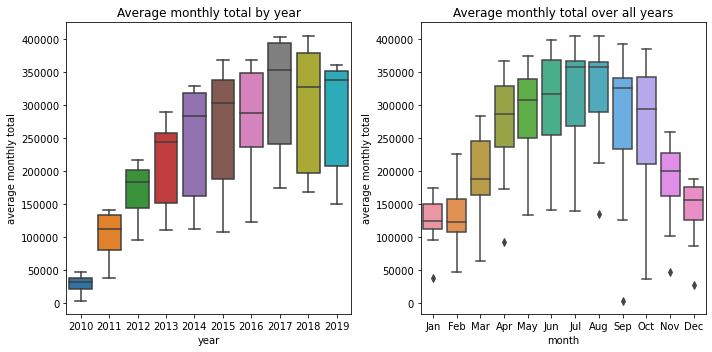

In [19]:
# 'year' plot shows: monthly average per year
# 'month' plot shows: monthly average over all years

fig, ax = plt.subplots(1,2, figsize = (10,5))

order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(ax = ax[0], x = 'year', y = 'total', data = df_by_month )
sns.boxplot(ax = ax[1], x = 'month', y = 'total', data = df_by_month, order = order )

ax[0].set_title('Average monthly total by year')
ax[1].set_title('Average monthly total over all years')

ax[0].set_ylabel('average monthly total')
ax[1].set_ylabel('average monthly total')
plt.tight_layout()
plt.show()

<h3> Back to imported dataframe for all years  </h3>

In [20]:
df_all_agg_daily.head()
df_all_agg_hourly.head()

,date,registered,casual,hour,year,month,day,year_month
0,2010-09-20,2,0.0,11,2010,9,Mon,2010-09
1,2010-09-20,17,0.0,12,2010,9,Mon,2010-09
2,2010-09-20,11,0.0,13,2010,9,Mon,2010-09
3,2010-09-20,4,2.0,14,2010,9,Mon,2010-09
4,2010-09-20,10,2.0,15,2010,9,Mon,2010-09


In [21]:
df_all_agg_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        3390 non-null   object
 1   registered  3390 non-null   int64 
 2   casual      3390 non-null   int64 
 3   year        3390 non-null   int64 
 4   month       3390 non-null   int64 
 5   day         3390 non-null   object
 6   year_month  3390 non-null   object
dtypes: int64(4), object(3)
memory usage: 185.5+ KB


In [22]:
df_all_agg_daily['date'] = pd.to_datetime(df_all_agg_daily['date'])
df_all_agg_hourly['date'] = pd.to_datetime(df_all_agg_hourly['date'])

In [23]:
# Create dataframe with average daily users per month
df_all_monthly_mean = df_all_agg_daily [['date', 'registered', 'casual']].resample('M', on = 'date').mean()
df_all_monthly_mean.head(5)

,registered,casual
date,,
2010-09-30,245.818182,118.000000
2010-10-31,806.193548,353.548387
2010-11-30,1275.666667,303.900000
2010-12-31,826.451613,84.709677
2011-01-31,1110.903226,98.870968


In [24]:
# Create dataframe with average daily users per year (rolling mean)
df_all_rolling_365 = df_all_agg_daily [['date', 'registered', 'casual']].rolling(window = 365, on = 'date', center = True, min_periods = 365).mean()

In [25]:
df_all_rolling_365.head(200)

,date,casual,registered
0,2010-09-20,NaN,NaN
1,2010-09-21,NaN,NaN
2,2010-09-22,NaN,NaN
3,2010-09-23,NaN,NaN
4,2010-09-24,NaN,NaN
...,...,...,...
195,2011-04-03,605.375342,2224.306849
196,2011-04-04,605.671233,2232.295890
197,2011-04-05,606.841096,2242.301370
198,2011-04-06,608.136986,2252.367123


<h3> Number of users over time </h3>

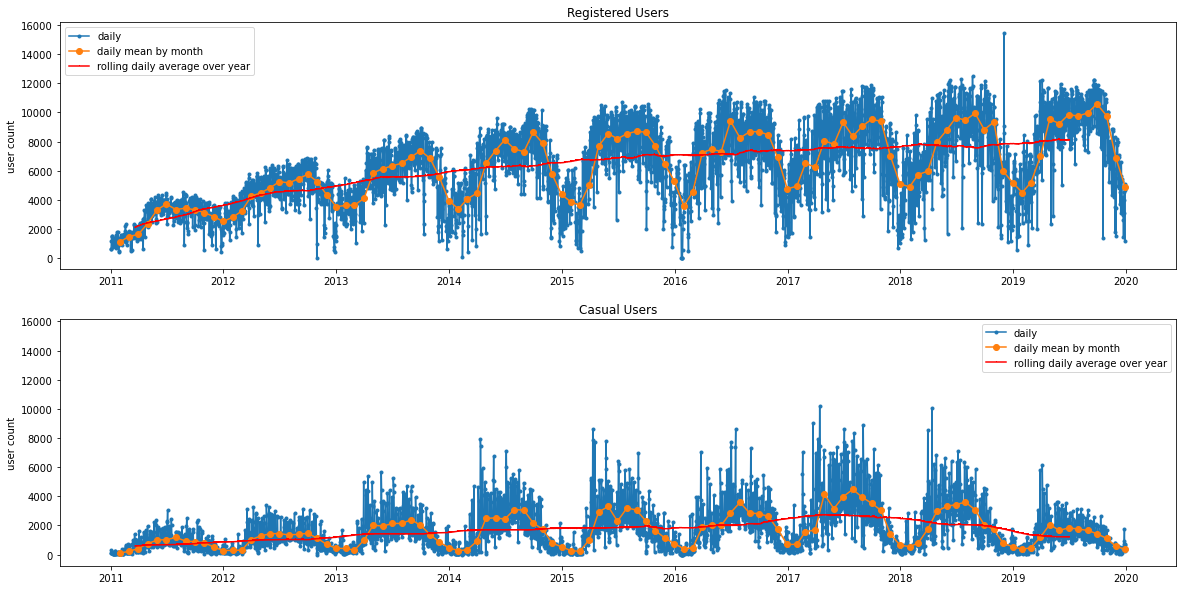

In [26]:
# Start and end of the date range to extract
start, end = '2011-01', '2019-12'


fig, ax = plt.subplots(2,1, figsize = (20,10), sharey = True)
ax[0].plot(df_all_agg_daily.set_index('date').loc[start:end, 'registered'], marker = '.', linestyle = '-', label = 'daily')
ax[0].plot(df_all_monthly_mean.loc[start:end, 'registered'], marker = 'o', linestyle = '-', label = 'daily mean by month')
ax[0].plot(df_all_rolling_365.set_index('date').loc[start:end, 'registered'], marker = ',', linestyle = '-', label = 'rolling daily average over year', c = 'r')

ax[0].set_title('Registered Users')
ax[0].set_ylabel('user count')
ax[0].legend()


ax[1].plot(df_all_agg_daily.set_index('date').loc[start:end, 'casual'], marker = '.', linestyle = '-', label = 'daily')
ax[1].plot(df_all_monthly_mean.loc[start:end, 'casual'], marker = 'o', linestyle = '-', label = 'daily mean by month')
ax[1].plot(df_all_rolling_365.set_index('date').loc[start:end, 'casual'], marker = ',', linestyle = '-', label = 'rolling daily average over year', c = 'r')

ax[1].set_title('Casual Users')
ax[1].set_ylabel('user count')
ax[1].legend()

plt.show()



In [27]:
df_all_agg_daily.head()

,date,registered,casual,year,month,day,year_month
0,2010-09-20,178,34,2010,9,Mon,2010-09
1,2010-09-21,215,109,2010,9,Tue,2010-09
2,2010-09-22,260,117,2010,9,Wed,2010-09
3,2010-09-23,249,124,2010,9,Thu,2010-09
4,2010-09-24,206,156,2010,9,Fri,2010-09


In [28]:
# Create dataframe with daily mean per year-month
df_all_daily_mean_per_month = df_all_agg_daily.groupby('year_month').mean()
df_all_daily_mean_per_month[['year','month']] = df_all_daily_mean_per_month[['year','month']].astype('int')


In [29]:
df_all_daily_mean_per_month

,registered,casual,year,month
year_month,,,,
2010-09,245.818182,118.000000,2010,9
2010-10,806.193548,353.548387,2010,10
2010-11,1275.666667,303.900000,2010,11
2010-12,826.451613,84.709677,2010,12
2011-01,1110.903226,98.870968,2011,1
...,...,...,...,...
2019-08,9960.225806,1654.096774,2019,8
2019-09,10574.866667,1432.633333,2019,9
2019-10,9775.741935,1113.032258,2019,10


Text(0.5, 1.0, 'Casual users by month')

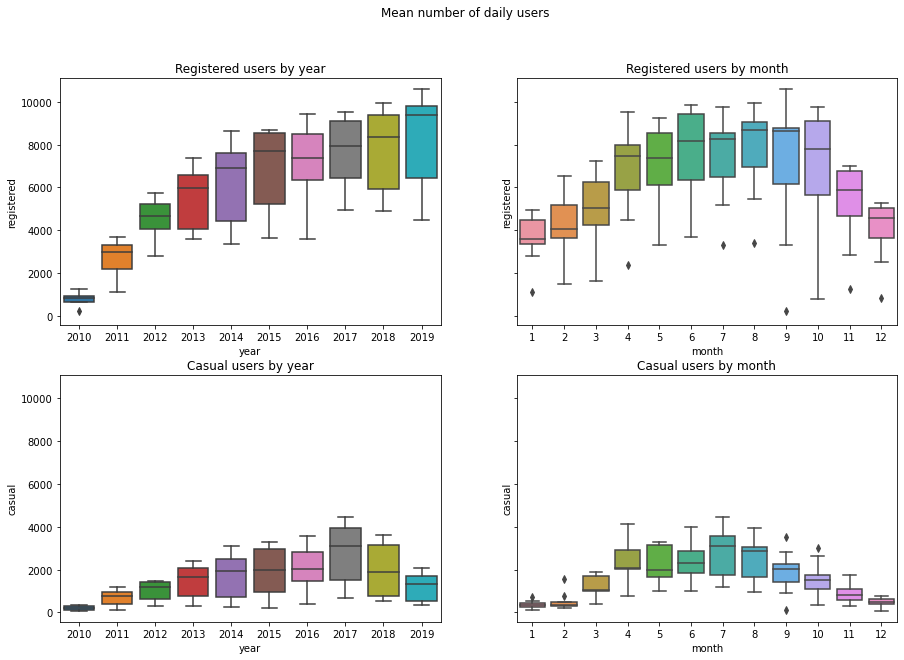

In [30]:
fig, axes = plt.subplots(2,2, figsize = (15,10), sharey = True)
fig.suptitle('Mean number of daily users')
sns.boxplot(ax = axes[0,0],x = 'year', y = 'registered', data = df_all_daily_mean_per_month)
axes[0,0].set_title('Registered users by year')
sns.boxplot(ax = axes[0,1],x = 'month', y = 'registered', data = df_all_daily_mean_per_month)
axes[0,1].set_title('Registered users by month')
sns.boxplot(ax = axes[1,0],x = 'year', y = 'casual', data = df_all_daily_mean_per_month )
axes[1,0].set_title('Casual users by year')
sns.boxplot(ax = axes[1,1],x = 'month', y = 'casual', data = df_all_daily_mean_per_month)
axes[1,1].set_title('Casual users by month')

<h5> Now need to look at seasonal_decompose </h5>

In [31]:
df_all_daily_mean_per_month.head(2)

,registered,casual,year,month
year_month,,,,
2010-09,245.818182,118.000000,2010,9
2010-10,806.193548,353.548387,2010,10


In [32]:
df_all_daily_mean_per_month.index = pd.to_datetime(df_all_daily_mean_per_month.index)

In [33]:
registered_mult = seasonal_decompose(df_all_daily_mean_per_month['registered'], model='multiplicative', extrapolate_trend='freq')
casual_mult = seasonal_decompose(df_all_daily_mean_per_month['casual'], model='multiplicative', extrapolate_trend='freq')

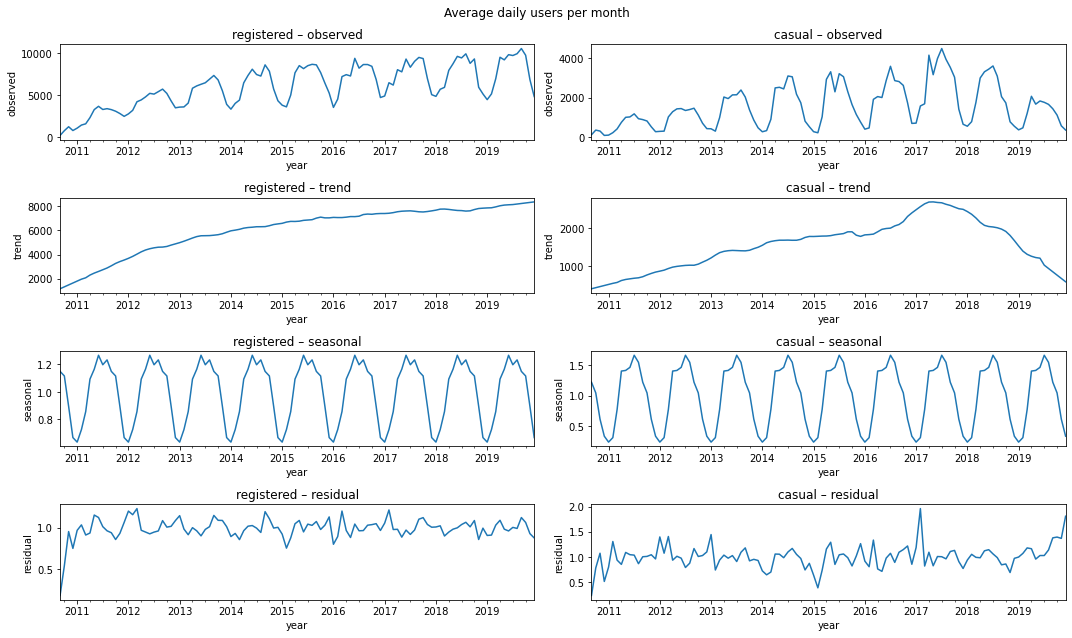

In [93]:
fig,ax = plt.subplots(4,2, figsize = (15,9))

fig.suptitle('Average daily users per month')

registered_mult.observed.plot(ax = ax[0][0], legend = False)
ax[0][0].set_xlabel('year')
ax[0][0].set_ylabel('observed')
ax[0][0].set_title('registered – observed')

registered_mult.trend.plot(ax = ax[1][0], legend = False)
ax[1][0].set_xlabel('year')
ax[1][0].set_ylabel('trend')
ax[1][0].set_title('registered – trend')

registered_mult.seasonal.plot(ax = ax[2][0], legend = False)
ax[2][0].set_xlabel('year')
ax[2][0].set_ylabel('seasonal')
ax[2][0].set_title('registered – seasonal')

registered_mult.resid.plot(ax = ax[3][0], legend = False)
ax[3][0].set_xlabel('year')
ax[3][0].set_ylabel('residual')
ax[3][0].set_title('registered – residual')


casual_mult.observed.plot(ax = ax[0][1], legend = False)
ax[0][1].set_xlabel('year')
ax[0][1].set_ylabel('observed')
ax[0][1].set_title('casual – observed')

casual_mult.trend.plot(ax = ax[1][1], legend = False)
ax[1][1].set_xlabel('year')
ax[1][1].set_ylabel('trend')
ax[1][1].set_title('casual – trend')

casual_mult.seasonal.plot(ax = ax[2][1], legend = False)
ax[2][1].set_xlabel('year')
ax[2][1].set_ylabel('seasonal')
ax[2][1].set_title('casual – seasonal')

casual_mult.resid.plot(ax = ax[3][1], legend = False)
ax[3][1].set_xlabel('year')
ax[3][1].set_ylabel('residual')
ax[3][1].set_title('casual – residual')

plt.tight_layout()
plt.show()


In [35]:
4000/3

1333.3333333333333

In [36]:
df_all_daily_mean_per_month.head()

,registered,casual,year,month
year_month,,,,
2010-09-01,245.818182,118.000000,2010,9
2010-10-01,806.193548,353.548387,2010,10
2010-11-01,1275.666667,303.900000,2010,11
2010-12-01,826.451613,84.709677,2010,12
2011-01-01,1110.903226,98.870968,2011,1


In [37]:
registered_add = seasonal_decompose(df_all_daily_mean_per_month['registered'], model='additive', extrapolate_trend='freq')
casual_add = seasonal_decompose(df_all_daily_mean_per_month['casual'], model='additive', extrapolate_trend='freq')

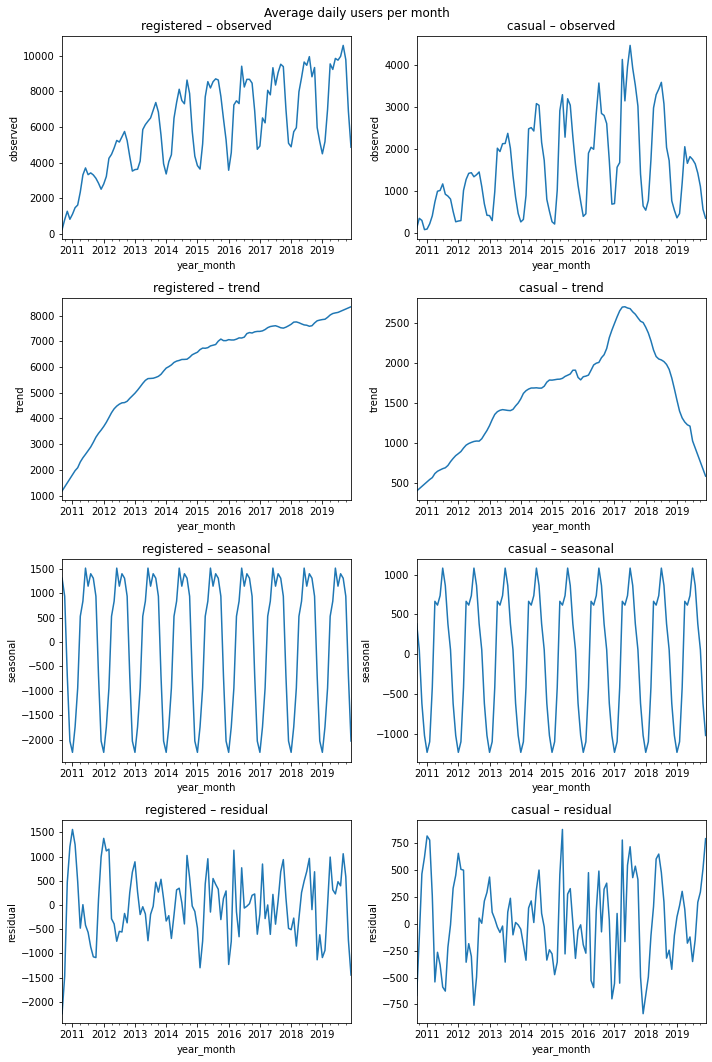

In [38]:
fig,ax = plt.subplots(4,2, figsize = (10,15))

fig.suptitle('Average daily users per month')

registered_add.observed.plot(ax = ax[0][0], legend = False)
ax[0][0].set_ylabel('observed')
ax[0][0].set_title('registered – observed')

registered_add.trend.plot(ax = ax[1][0], legend = False)
ax[1][0].set_ylabel('trend')
ax[1][0].set_title('registered – trend')

registered_add.seasonal.plot(ax = ax[2][0], legend = False)
ax[2][0].set_ylabel('seasonal')
ax[2][0].set_title('registered – seasonal')

registered_add.resid.plot(ax = ax[3][0], legend = False)
ax[3][0].set_ylabel('residual')
ax[3][0].set_title('registered – residual')


casual_add.observed.plot(ax = ax[0][1], legend = False)
ax[0][1].set_ylabel('observed')
ax[0][1].set_title('casual – observed')

casual_add.trend.plot(ax = ax[1][1], legend = False)
ax[1][1].set_ylabel('trend')
ax[1][1].set_title('casual – trend')

casual_add.seasonal.plot(ax = ax[2][1], legend = False)
ax[2][1].set_ylabel('seasonal')
ax[2][1].set_title('casual – seasonal')

casual_add.resid.plot(ax = ax[3][1], legend = False)
ax[3][1].set_ylabel('residual')
ax[3][1].set_title('casual – residual')

plt.tight_layout()
plt.show()


Calculate growth per year for use by registered and casual users

In [39]:
annual_growth = df_all_daily_mean_per_month.groupby('year').sum()[['registered', 'casual']]
annual_growth['annual_growth_reg'] = np.zeros((len(annual_growth),1))
annual_growth['annual_growth_cas'] = np.zeros((len(annual_growth),1))
annual_growth = annual_growth.reset_index()
for i in range(2, len(annual_growth)):
    
    annual_growth.loc[i, 'annual_growth_reg'] = 100* ((annual_growth.loc[i, 'registered'] / annual_growth.loc[i-1, 'registered']) - 1)
    annual_growth.loc[i, 'annual_growth_cas'] = 100*((annual_growth.loc[i, 'casual'] / annual_growth.loc[i-1, 'casual']) - 1)

In [96]:
annual_growth.loc[0:,:]

,year,registered,casual,annual_growth_reg,annual_growth_cas
0,2010,3154.130010,860.158065,0.000000,0.000000
1,2011,32144.116743,8089.775730,0.000000,0.000000
2,2012,54274.488246,12197.594142,68.847347,50.777902
3,2013,66800.563594,17053.324885,23.079122,39.808922
4,2014,75284.644854,20302.020661,12.700613,19.050219
5,2015,82298.300154,22124.770814,9.316183,8.978171
6,2016,85266.142714,23957.835892,3.606202,8.285126
7,2017,91271.567972,32243.871275,7.043153,34.585909
8,2018,91683.229570,24570.701613,0.451029,-23.797297
9,2019,97085.056298,14466.188863,5.891837,-41.124234


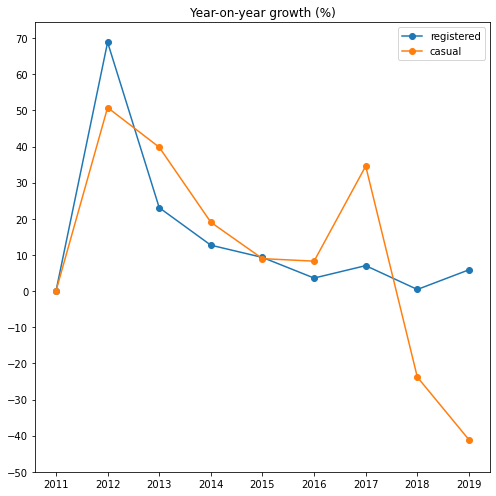

In [104]:
fig, ax = plt.subplots( figsize = (7,7))
ax.set_title('Year-on-year growth (%)')
ax.plot(annual_growth.loc[1:,'year'], annual_growth.loc[1:, 'annual_growth_reg'], marker = 'o', label = 'registered')
ax.plot(annual_growth.loc[1:, 'year'], annual_growth.loc[1:,'annual_growth_cas'], marker = 'o', label = 'casual')

ax.set_yticks(list(range(-50, 71, 10)))
ax.set_xticks(list(range(2011,2020,1)))
plt.legend()

plt.tight_layout()
plt.show()

Some calculations of number of trips per station <br>
Using dataframes created in plot_geopandas_part 3

In [105]:
stations_full_2011 = pd.read_csv('cleaned_data/stations_full_2011.csv')
stations_full_2012 = pd.read_csv('cleaned_data/stations_full_2012.csv')
stations_full_2013 = pd.read_csv('cleaned_data/stations_full_2013.csv')
stations_full_2014 = pd.read_csv('cleaned_data/stations_full_2014.csv')
stations_full_2015 = pd.read_csv('cleaned_data/stations_full_2015.csv')
stations_full_2016 = pd.read_csv('cleaned_data/stations_full_2016.csv')
stations_full_2017 = pd.read_csv('cleaned_data/stations_full_2017.csv')

In [107]:
stations_full_2011.head(2)

,station,region,lat,lon,start_total,start_registered,start_casual,end_total,end_registered,end_casual
0,5th & F St NW,"Washington, DC",38.897222,-77.019347,14942,11998,2944,16137,12824,3313
1,14th & Harvard St NW,"Washington, DC",38.926800,-77.032200,17507,15921,1586,12877,11500,1377


In [135]:
N = 10000

all_stations_full = [stations_full_2011,  stations_full_2012, stations_full_2013, stations_full_2014, stations_full_2015, stations_full_2016, stations_full_2017]
bad_good = []

for station in all_stations_full:
    bad_station = station[station['start_total'] + station['end_total'] < 2*N].count()['station']
    good_station = station[station['start_total'] + station['end_total'] > 2*N].count()['station']
    bad_good.append((bad_station, good_station, (100*good_station/(bad_station + good_station)).round(2)))
print(bad_good)
df_20k = pd.DataFrame(bad_good).rename(columns = {0: f'under {int(2*N/1000)}k trips per year', 1: f'over {int(2*N/1000)}k trips per year', 2: 'percentage'})
df_20k.index = list(range(2011,2018))
df_20k

[(85, 59, 40.97), (107, 84, 43.98), (202, 103, 33.77), (235, 111, 32.08), (237, 120, 33.61), (309, 126, 28.97), (347, 140, 28.75)]


,under 20k trips per year,over 20k trips per year,percentage
2011,85,59,40.97
2012,107,84,43.98
2013,202,103,33.77
2014,235,111,32.08
2015,237,120,33.61
2016,309,126,28.97
2017,347,140,28.75


In [140]:
N = 500

all_stations_full = [stations_full_2011,  stations_full_2012, stations_full_2013, stations_full_2014, stations_full_2015, stations_full_2016, stations_full_2017]
bad_good = []

for station in all_stations_full:
    bad_station = station[station['start_total'] + station['end_total'] < 2*N].count()['station']
    good_station = station[station['start_total'] + station['end_total'] > 2*N].count()['station']
    bad_good.append((bad_station, good_station, (100*bad_station/(bad_station + good_station)).round(1)))
print(bad_good)
df_1k = pd.DataFrame(bad_good).rename(columns = {0: f'under {int(2*N/1000)}k trips per year', 1: f'over {int(2*N/1000)}k trips per year', 2: 'percentage of bad stations'})
df_1k.index = list(range(2011,2018))
df_1k

[(32, 112, 22.2), (15, 176, 7.9), (75, 230, 24.6), (55, 291, 15.9), (43, 314, 12.0), (76, 359, 17.5), (81, 406, 16.6)]


,under 1k trips per year,over 1k trips per year,percentage of bad stations
2011,32,112,22.2
2012,15,176,7.9
2013,75,230,24.6
2014,55,291,15.9
2015,43,314,12.0
2016,76,359,17.5
2017,81,406,16.6


<h3> Look at big data set with multiple years </h3>

OK now we want to look at the full data set that includes all the info (including start / end stations, duration, bike number, etc.)

In [ ]:
df_all_years = pd.read_csv('cleaned_data/df_all_years.csv', parse_dates = ['start_date', 'end_date'])


In [ ]:
df_all_years.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


In [ ]:
df_all_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19117643 entries, 0 to 19117642
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   duration              int64         
 1   start_date            datetime64[ns]
 2   end_date              datetime64[ns]
 3   start_station_number  int64         
 4   start_station         object        
 5   end_station_number    int64         
 6   end_station           object        
 7   bike_number           object        
 8   member_type           object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 1.3+ GB


In [ ]:
# df_all_years['Start date'] = pd.to_datetime(df_all_years['Start date'])
# df_all_years['End date'] = pd.to_datetime(df_all_years['End date'])

In [ ]:
df_all_years['bike_number'].unique().shape

(4844,)

Almost 3000 bikes in the years 2011 to 2013

In [ ]:
# Count number of bikes by year

num_bikes_2011 = df_all_years[df_all_years['start_date'].dt.year == 2011]['bike_number'].unique().shape[0]
num_bikes_2012 = df_all_years[df_all_years['start_date'].dt.year == 2012]['bike_number'].unique().shape[0]
num_bikes_2013 = df_all_years[df_all_years['start_date'].dt.year == 2013]['bike_number'].unique().shape[0]

num_bikes_2011, num_bikes_2012, num_bikes_2013


(1325, 1749, 2920)

Interesting. Number of bikes doubled over two years.

In [ ]:
# Create lists of unique bike names for all 3 years

bikes_2011 = df_all_years[df_all_years['start_date'].dt.year == 2011]['bike_number'].unique()
bikes_2012 = df_all_years[df_all_years['start_date'].dt.year == 2012]['bike_number'].unique()
bikes_2013 = df_all_years[df_all_years['start_date'].dt.year == 2013]['bike_number'].unique()

In [ ]:
len(bikes_2011), len(bikes_2012), len(bikes_2013)

(1325, 1749, 2920)

In [ ]:
len (np.intersect1d(bikes_2011, bikes_2012)), len (np.intersect1d(bikes_2012, bikes_2013))

(1303, 1718)

Loss of bikes between 2011 and 2012: 22 <br>
Loss of bikes between 2012 and 2013: 31

The correct bike names start with 'W' or 'w'. <br>
Let's separate the bike names into 'correct' and 'corrupt'

In [ ]:
# Create two lists: one for correct bike names, one for corrupted bike names

bikes_correct_2011 = []
bikes_corrupt_2011 = []

for bike in bikes_2011:
    if bike[0] == 'W' or  bike[0] == 'w':
        bikes_correct_2011.append(bike)
    else:
        bikes_corrupt_2011.append(bike)

bikes_correct_2012 = []
bikes_corrupt_2012 = []

for bike in bikes_2012:
    if bike[0] == 'W' or  bike[0] == 'w':
        bikes_correct_2012.append(bike)
    else:
        bikes_corrupt_2012.append(bike)


bikes_correct_2013 = []
bikes_corrupt_2013 = []

for bike in bikes_2013:
    if bike[0] == 'W' or  bike[0] == 'w':
        bikes_correct_2013.append(bike)
    else:
        bikes_corrupt_2013.append(bike)



In [ ]:
len (bikes_correct_2011), len(bikes_corrupt_2011)

(1309, 16)

In [ ]:
print(bikes_corrupt_2011)

['?(0xFFFFFFFFAAC5A4C0)', '?(0x000000003EB026B9)', '?(0x000000007C120F6A)', '?(0xFFFFFFFF9A5FEA16)', '?(0xFFFFFFFFEBA95C18)', '?(0xFFFFFFFFEE8DADF1)', '?(0xFFFFFFFFFAF0B948)', '?(0x0000000026B3BBA8)', '?(0x000000002FD1067B)', '?(0x000000004752DD3A)', '?(0x000000005F128A5C)', '?(0xFFFFFFFFEB7B5641)', '?(0x000000006945F6DC)', '?(0xFFFFFFFF83DE3658)', '?(0xFFFFFFFFB44D36A5)', '?(0x000000004443704F)']


In [ ]:
len(bikes_correct_2011), len(bikes_correct_2012), len(bikes_correct_2013)
len(bikes_corrupt_2011), len(bikes_corrupt_2012), len(bikes_corrupt_2013)

(16, 3, 1)

In [ ]:
for bike in bikes_corrupt_2011:
    print (df_all_years [df_all_years['bike_number'] == bike]['duration'].count())

123
564
388
225
894
181
36
246
1484
299
9
885
14
185
34
198


Damn. The corrupt bike numbers all had lots of rides. <br>
I guess one thing you can do is just give the weird-looking bike numbers a new correct-looking number.

In [ ]:
#Assign new names to corrupt bike names


bikes_2011_new_nums = ['2011_' + str(i) for i in range(len(bikes_corrupt_2011))]
dictionary_new_bike_nums_2011 = dict(zip(bikes_corrupt_2011, bikes_2011_new_nums))


bikes_2012_new_nums = ['2012_' + str(i) for i in range(len(bikes_corrupt_2012))]
dictionary_new_bike_nums_2012 = dict(zip(bikes_corrupt_2012, bikes_2012_new_nums))

bikes_2013_new_nums = ['2013_' + str(i) for i in range(len(bikes_corrupt_2013))]
dictionary_new_bike_nums_2013 = dict(zip(bikes_corrupt_2013, bikes_2013_new_nums))

In [ ]:
dictionary_new_bike_nums_2011, dictionary_new_bike_nums_2012, dictionary_new_bike_nums_2013

({'?(0xFFFFFFFFAAC5A4C0)': '2011_0',
  '?(0x000000003EB026B9)': '2011_1',
  '?(0x000000007C120F6A)': '2011_2',
  '?(0xFFFFFFFF9A5FEA16)': '2011_3',
  '?(0xFFFFFFFFEBA95C18)': '2011_4',
  '?(0xFFFFFFFFEE8DADF1)': '2011_5',
  '?(0xFFFFFFFFFAF0B948)': '2011_6',
  '?(0x0000000026B3BBA8)': '2011_7',
  '?(0x000000002FD1067B)': '2011_8',
  '?(0x000000004752DD3A)': '2011_9',
  '?(0x000000005F128A5C)': '2011_10',
  '?(0xFFFFFFFFEB7B5641)': '2011_11',
  '?(0x000000006945F6DC)': '2011_12',
  '?(0xFFFFFFFF83DE3658)': '2011_13',
  '?(0xFFFFFFFFB44D36A5)': '2011_14',
  '?(0x000000004443704F)': '2011_15'},
 {'?(0x000000002FD1067B)': '2012_0',
  '?(0x000000004443704F)': '2012_1',
  '?(0xFFFFFFFF83DE3658)': '2012_2'},
 {'Z00046': '2013_0'})

<h3> Change corrupt bike numbers with new bike numbers </h3>

In [ ]:
df_all_years['bike_number'] = df_all_years['bike_number'].map(dictionary_new_bike_nums_2011).fillna(df_all_years['bike_number'])
df_all_years['bike_number'] = df_all_years['bike_number'].map(dictionary_new_bike_nums_2012).fillna(df_all_years['bike_number'])
df_all_years['bike_number'] = df_all_years['bike_number'].map(dictionary_new_bike_nums_2013).fillna(df_all_years['bike_number'])

In [ ]:
for bike in df_all_years['bike_number'].unique():
    print (bike)

W00742
W00032
W00993
W00344
W00883
W00850
W00804
W01084
W00812
W00803
W00256
W01023
W00472
W00685
W00930
W00476
W00955
W01066
W00824
W01029
W00821
W00833
W01123
W01034
W00796
W00764
W00868
W00775
W00570
W01103
W01058
W01069
2011_9
W00977
W00960
W00958
W00563
W00976
W00159
W00642
W00999
W00842
W00745
W01079
2011_2
W00911
W00322
W00829
W00814
W01113
W00569
W00428
W01050
W00903
W00968
W01007
W00826
W00340
W01024
W00830
W00196
W00512
W00377
W00747
W00142
W00777
W00614
W00795
W00289
W00735
W01059
W01016
W00872
W00758
W00605
W00772
W00318
W00928
W00867
W00380
W01008
W00819
W00194
W00873
W00973
W00961
W01018
W00860
W00959
W00948
W01067
W00760
W00509
W01083
W01030
W00555
W01000
W00825
W00807
W00838
W00734
W00557
W00198
W00918
W00039
W01070
W00971
W01063
W00519
W00858
W00780
W00523
W01101
W00637
W00743
W00773
W00526
W00648
W00566
W00639
W00281
W00471
W00996
W00707
W00492
W00491
W00886
W00910
W01124
W00119
W00855
W00363
W00518
W00332
W00100
W01077
W00538
W00822
W00755
W00896
W00240
W00501
W00342

In [ ]:
df_all_years.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


<h3> Check distribution of individual variables </h3>

In [ ]:
stats = df_all_years.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max'],'duration']
stats = pd.DataFrame(stats)

In [ ]:
stats = stats.apply(lambda x: x / 60)


In [ ]:
stats.rename({'duration': 'duration (mins)'}, axis = 1, inplace = True)

In [ ]:
stats

,duration (mins)
mean,18.232284
std,34.433228
min,1.000000
25%,6.633333
50%,11.216667
75%,19.033333
max,1439.900000


The max is 1439 minutes, which is around 24 hours. This must be an error. 

Let's remove all entries where duration is more than 60 minutes long, and run again. <br>

In [ ]:
# Select rows where duration is less than 60 minutes
df_all_years_shortened = df_all_years [df_all_years['duration'] < 3600]

In [ ]:
# Calculate number of trips lasting over 60 minutes
len(df_all_years) - len(df_all_years_shortened)

823985

In [ ]:
# Calculate percentage of trips with duration over 60 minutes 
(len(df_all_years) - len(df_all_years_shortened)) / (len(df_all_years))

0.04310076299677738

Ok. 4 % of all trips lasted over 60 minutes

Histogram of all trips lasting 60 minutes or less

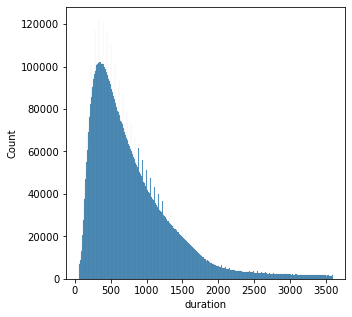

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (5,5))

sns.histplot(ax = ax, data = df_all_years_shortened, x = 'duration')
plt.show()

In [ ]:
df_all_years_shortened

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member
...,...,...,...,...,...,...,...,...,...
19117638,277,2017-12-31 23:43:17,2017-12-31 23:47:54,31109,7th & T St NW,31118,3rd & Elm St NW,W21036,Member
19117639,399,2017-12-31 23:51:55,2017-12-31 23:58:35,31125,15th & W St NW,31110,20th St & Florida Ave NW,W23147,Casual
19117640,393,2017-12-31 23:55:19,2018-01-01 00:01:52,31209,1st & N St SE,31609,Maine Ave & 7th St SW,W20144,Member
19117641,1319,2017-12-31 23:57:42,2018-01-01 00:19:42,31102,11th & Kenyon St NW,31102,11th & Kenyon St NW,W20860,Member


In [ ]:
# Number of stations per year:

num_stations_2011 = df_all_years [df_all_years['start_date'].dt.year == 2011].nunique()['start_station'] 
num_stations_2012 = df_all_years [df_all_years['start_date'].dt.year == 2012].nunique()['start_station']
num_stations_2013 = df_all_years [df_all_years['start_date'].dt.year == 2013].nunique()['start_station']

num_stations_2011, num_stations_2012, num_stations_2013

(144, 191, 305)

In [ ]:
# Size of fleet per year:

num_bikes_2011 = df_all_years [df_all_years['start_date'].dt.year == 2011].nunique()['bike_number'] 
num_bikes_2012 = df_all_years [df_all_years['start_date'].dt.year == 2012].nunique()['bike_number']
num_bikes_2013 = df_all_years [df_all_years['start_date'].dt.year == 2013].nunique()['bike_number']

num_bikes_2011, num_bikes_2012, num_bikes_2013

(1325, 1749, 2920)

In [ ]:
# Top 10 stations per year, sorted by casual vs registered
# Top 10 start stations per year, sorted by casual vs registered
# Top 10 end stations per year, sorted by casual vs registered


# Top 10 routes (start – end) per year, sorted by casual vs registered

In [ ]:
mask_2011 = df_all_years['start_date'].dt.year == 2011
mask_2012 = df_all_years['start_date'].dt.year == 2012
mask_2013 = df_all_years['start_date'].dt.year == 2013

mask_registered = df_all_years['member_type'] == 'Member'
mask_casual = df_all_years['member_type'] == 'Casual'



In [ ]:
df_all_years[mask_2011 & mask_registered]

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type
115597,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
115599,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
115600,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
115602,158,2011-01-01 00:32:33,2011-01-01 00:35:11,31605,3rd & D St SE,31618,4th & East Capitol St NE,W01033,Member
115603,560,2011-01-01 00:35:48,2011-01-01 00:45:09,31203,14th & Rhode Island Ave NW,31201,15th & P St NW,W00766,Member
...,...,...,...,...,...,...,...,...,...
1342359,300,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member
1342360,387,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member
1342361,261,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member
1342362,2060,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member


In [ ]:
# Top 10 start stations by year and by user type

start_stations_2011_all = df_all_years[mask_2011]['start_station'].value_counts()
start_stations_2011_registered = df_all_years[mask_2011 & mask_registered]['start_station'].value_counts()
start_stations_2011_casual = df_all_years[mask_2011 & mask_casual]['start_station'].value_counts()

start_stations_2012_all = df_all_years[mask_2012]['start_station'].value_counts()
start_stations_2012_registered = df_all_years[mask_2012 & mask_registered]['start_station'].value_counts()
start_stations_2012_casual = df_all_years[mask_2012 & mask_casual]['start_station'].value_counts()

start_stations_2013_all = df_all_years[mask_2013]['start_station'].value_counts()
start_stations_2013_registered = df_all_years[mask_2013 & mask_registered]['start_station'].value_counts()
start_stations_2013_casual = df_all_years[mask_2013 & mask_casual]['start_station'].value_counts()



/var/folders/68/lmdx_4hd4msbstk8y2t5phyh0000gn/T/ipykernel_65908/3173287824.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels = start_stations_2011_all.index[0:10], rotation = 90)
/var/folders/68/lmdx_4hd4msbstk8y2t5phyh0000gn/T/ipykernel_65908/3173287824.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels = start_stations_2011_registered.index[0:10], rotation = 90)
/var/folders/68/lmdx_4hd4msbstk8y2t5phyh0000gn/T/ipykernel_65908/3173287824.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(labels = start_stations_2011_casual.index[0:10], rotation = 90)


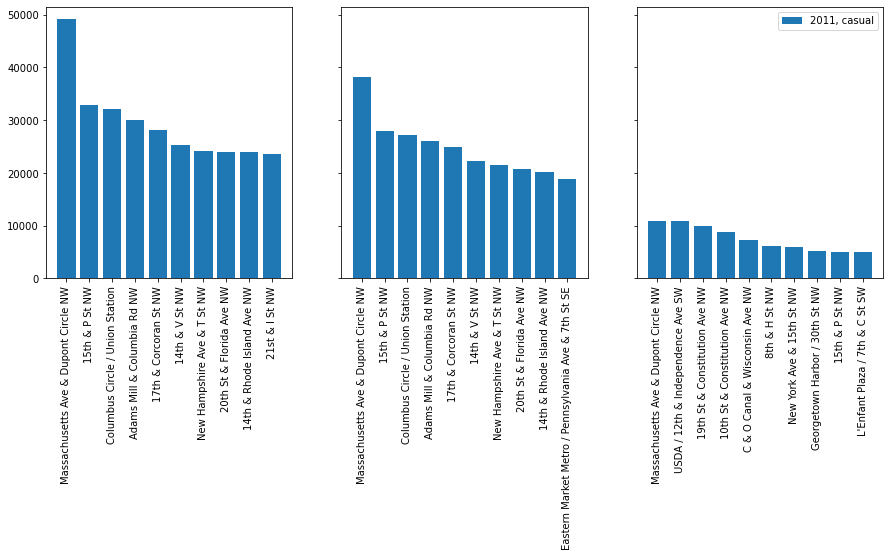

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (15, 5), sharey = True)


axes[0].bar(start_stations_2011_all.index[0:10], start_stations_2011_all[0:10], label = '2011, all')
axes[0].set_xticklabels(labels = start_stations_2011_all.index[0:10], rotation = 90)

axes[1].bar(start_stations_2011_registered.index[0:10], start_stations_2011_registered[0:10], label = '2011, registered')
axes[1].set_xticklabels(labels = start_stations_2011_registered.index[0:10], rotation = 90)

axes[2].bar(start_stations_2011_casual.index[0:10], start_stations_2011_casual[0:10], label = '2011, casual')
axes[2].set_xticklabels(labels = start_stations_2011_casual.index[0:10], rotation = 90)

plt.legend()
plt.show()
